# Problem 2.1

**Integrated Energy Grids**


**Problem 2.1**

**Given the following optimization problem,**


\begin{alignat*}{3}
\max_{x,y} \quad & 2x + 5y & \\
\text{s.t.} \quad & -x + y & \geq & -3, \\
& 2x + y & \leq & 14, \\
& -\frac{1}{2}x + y & \geq & \frac{3}{2}, \\
& x & \geq & 1.
\end{alignat*}





**a) Solve the optimization problem graphically (pen and paper or on your laptop). Note that it is a maximization problem, whereas we will mostly work with minimizations. Reformulate as a minimization problem.**


**b) Return to the original formulation. Indicate which constraints are binding and calculate the values of the Lagrange multipliers.**

**c) In the above set-up, we have a unique solution to our maximization problem (existence and uniqueness). Adapt the exercise such that this is no longer the case.**

**a)**

We will use numpy to operate with arrays and matplotlib.pyplot to plot the results. We also use linopy to solve linear problems and work with pandas to work with dataframes.

In [1]:
import pandas as pd
import numpy as np
import linopy 
import matplotlib.pyplot as plt

We define the constraints, and rewrite them in the form y = mx + b. For plotting purposes, we define an evenly spaced sample of the x-values.

In [2]:
x = np.linspace(0, 10, 100)

y0 = x - 3
y1 = -2*x + 14
y2 = 0.5*x + 1.5

# The following will make it easier to fill the area of the feasible space in the graphical solution.

con0 = lambda a: a - 3
con1 = lambda a: -2*a + 14
con2 = lambda a: 0.5*a + 1.5

We will also plot different level sets of the objective function.

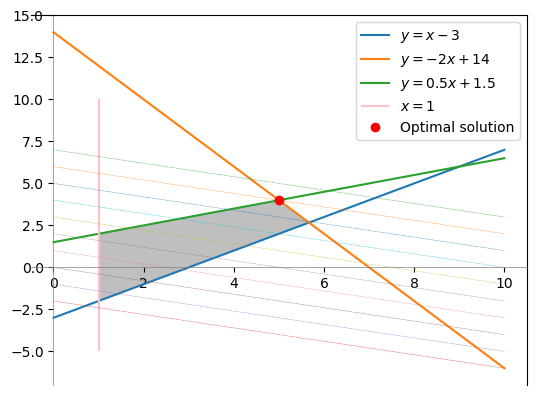

In [3]:
fig, ax = plt.subplots()

# Plot the inequalities
ax.plot(x, y0, label=r'$y = x - 3$')
ax.plot(x, y1, label=r'$y = -2x + 14$')
ax.plot(x, y2, label=r'$y = 0.5x + 1.5$')

# Add the constant function
ax.vlines(x=1, ymin=-5, ymax=10, label = r'$x = 1$', color='pink')

# Fill feasible region
z1 = np.linspace(1,5,40)
z2 = np.linspace(5,17/3,40)

ax.fill_between(z1, con0(z1), con2(z1), color='gray', edgecolor=None,alpha=0.5)
ax.fill_between(z2, con0(z2), con1(z2),  color='gray', edgecolor=None,alpha=0.5)

# Plot different level sets of obj.
#opt_val = 30
for val in range(-10, 40, 5):
    y = (val - 2*x)/5
    ax.plot(x, y, ls='--', lw=0.3)

# Plot the optimal solution
ax.plot(5, 4, 'ro', label='Optimal solution')

# Plot the obj
ax.legend();

# Plot the coordinate system
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('gray')
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(0.5)





We can write the problem as a minimization problem as follows:

\begin{alignat*}{3}
\min_{x,y} \quad & -2x - 5y & \\
\text{s.t.} \quad & -x + y & \geq & -3, \\
& 2x + y & \leq & 14, \\
& -\frac{1}{2}x + y & \geq & \frac{3}{2}, \\
& x & \geq & 1.
\end{alignat*}



b)

Set up the problem in linopy:

In [4]:
# For reference:
m21 = linopy.Model()

# Add the variables.
x = m21.add_variables(lower=0,name="x")
y = m21.add_variables(lower=0,name="y")

# Add the constraints and note the sense of the inequality.
m21.add_constraints(-x + y >= -3)
m21.add_constraints(2*x + y <= 14)
m21.add_constraints(-0.5*x + y <= 1.5)
m21.add_constraints(x >= 1)

# Add the objective function and specify it as a maximization problem.
m21.add_objective(2*x + 5*y, sense = "max")

# Solve the maximization problem.
m21.solve(solver_name="gurobi")

m21.solution

Set parameter Username
Set parameter LicenseID to value 2604332
Academic license - for non-commercial use only - expires 2025-12-30
Read LP format model from file C:\Users\34620\AppData\Local\Temp\linopy-problem-39xpzb33.lp
Reading time = 0.00 seconds
obj: 4 rows, 2 columns, 7 nonzeros
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 2 columns and 7 nonzeros
Model fingerprint: 0x10c518a0
Coefficient statistics:
  Matrix range     [5e-01, 2e+00]
  Objective range  [2e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 1 rows and 0 columns
Presolve time: 0.01s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.2000000e+01   8.497000e+00   0.000000e+00   

<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    x        float64 8B 5.0
    y        float64 8B 4.0

Print the duals of the optimization problem

In [5]:
m21.dual

<xarray.Dataset> Size: 32B
Dimensions:  ()
Data variables:
    con0     float64 8B 0.0
    con1     float64 8B 1.8
    con2     float64 8B 3.2
    con3     float64 8B 0.0

c)

Different ways of changing the problem so it no longer has a unique solution:
- make it infeasible (e.g. add a constraint $y \geq 4.1$)
- remove uniqueness (e.g. change the objective function to be $min_{x,y} x$), get more than one unique solution along the edge in $x=1$.